- **개요**: SVM은 주로 분류와 회귀 문제에 사용되는 지도 학습 알고리즘입니다.
- **작동 원리**: SVM은 데이터를 분류하는 최적의 초평면(선, 평면, 또는 고차원 평면)을 찾아냅니다. 이 최적의 초평면은 서로 다른 클래스 간의 마진(즉, 가장 가까운 데이터 포인트 사이의 거리)을 최대화하는 방향으로 정의됩니다.
- **커널 트릭**: 비선형 데이터를 처리하기 위해 SVM은 '커널 트릭'을 사용하여 데이터를 더 높은 차원의 공간으로 변환하고, 해당 공간에서 선형 분리를 수행합니다.

In [21]:
# 패키지 설치
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [22]:
# 예제 데이터를 로드하고 트레이닝/테스트 세트로 나눕니다:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Iris 데이터셋에 대한 기본 정보

데이터셋은 세 종류의 붓꽃(Iris setosa, Iris versicolor, Iris virginica) 각각 50개의 샘플로 구성되어 있습니다. 총 150개의 샘플로 구성되어 있습니다.
특성(Features):

각 샘플은 4개의 특성을 가지고 있습니다.
Sepal length (꽃받침 길이)
Sepal width (꽃받침 너비)
Petal length (꽃잎 길이)
Petal width (꽃잎 너비)
모든 특성 값은 cm 단위로 측정되었습니다.
목표(Target):

각 샘플에는 해당하는 붓꽃의 종류를 나타내는 라벨이 붙어 있습니다. 이 라벨은 다음과 같이 3가지입니다:
0: Iris setosa
1: Iris versicolor
2: Iris virginica

용도:
이 데이터셋은 주로 분류 알고리즘을 학습하고 테스트하는 데 사용됩니다. 특성을 기반으로 꽃의 종류를 분류하는 문제를 해결하기 위해 사용됩니다

In [23]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

test_size=0.3:

전체 데이터 중에서 30%가 테스트 데이터로 사용됩니다. 따라서 나머지 70%는 훈련 데이터로 사용됩니다.
random_state=42:

random_state는 데이터 분할 시 사용되는 난수 생성기의 초기값을 설정합니다.
동일한 random_state 값을 사용하면 코드를 여러 번 실행할 때마다 동일한 데이터 분할이 발생합니다. 이렇게 하면 실험 결과의 일관성을 유지할 수 있습니다. random_state 값을 지정하지 않으면 매번 다른 분할 결과가 나올 수 있습니다.

In [24]:
# 데이터를 표준화: 데이터의 스케일을 조정하여 평균이 0이고 표준 편차가 1이 되도록 변환
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
# SVM 모델을 트레이닝합니다:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=42)

"margin"이란 하이퍼플레인에서 가장 가까운 훈련 샘플까지의 거리를 의미

kernel='linear': SVM의 커널로 "선형"을 선택합니다. 
<br><br>
커널은 데이터를 높은 차원의 공간으로 매핑하는 함수입니다.
<br>
선형 커널은 원래의 특성 공간에서 선형적인 결정 경계를 찾습니다. 다른 유명한 커널로는 'poly' (다항식 커널), 'rbf' (방사 기저 함수 커널) 등이 있습니다.

C=1.0: C는 정규화 매개변수입니다. 
<br><br>
C값이 작을수록 모델은 잘못 분류된 데이터 포인트에 덜 민감해집니다. 
<br>
즉, 큰 C 값은 여백 위반을 최소화하는 반면 작은 C 값은 여백 자체를 최대화하려고 합니다.

정규화 매개변수는 머신러닝 모델에서 과적합을 방지하기 위한 주요 도구 중 하나입니다. 여기서 "과적합"이란 모델이 학습 데이터에 너무 잘 맞아서 실제 실전(테스트 데이터나 실제 환경)에서의 성능이 떨어지는 현상을 의미합니다.
<br><br>
**정규화(regularization)**는 모델의 복잡성에 패널티를 주는 방식으로 작동합니다. 복잡한 모델은 여러 특징을 고려하여 깊게 학습하는 경향이 있기 때문에, 과적합의 위험이 있습니다. 정규화는 모델의 복잡성을 제한하여 이러한 위험을 줄이는 역할을 합니다.



L1 정규화 (Lasso regularization): 모델의 가중치 절대값의 합에 대한 패널티를 추가합니다. 이는 몇몇 가중치를 정확히 0으로 만들어 특징 선택의 효과를 가져올 수 있습니다.

L2 정규화 (Ridge regularization): 모델의 가중치 제곱의 합에 대한 패널티를 추가합니다. 이는 모든 가중치를 작게 만들려는 경향이 있지만, 완전히 0으로 만들지는 않습니다.

In [26]:
#테스트 데이터에 대한 예측을 수행하고 성능을 평가합니다:
y_pred = svm.predict(X_test_std)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


## 2D로 그래프 표현

/tmp/ipykernel_6774/3888982293.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', len(np.unique(y)))
/tmp/ipykernel_6774/3888982293.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


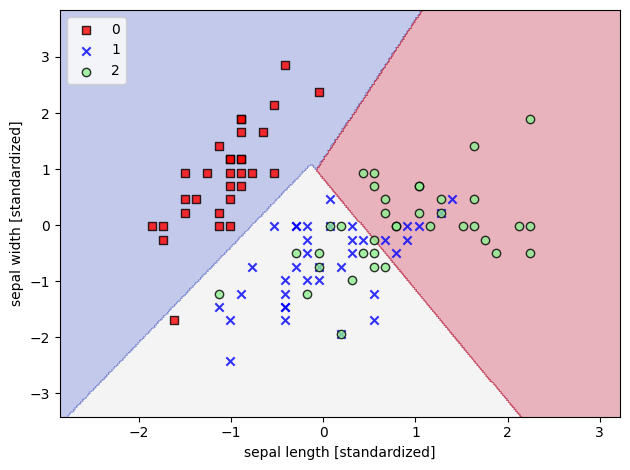

In [28]:
# 2D에서 SVM을 다시 학습합니다
svm_2d = SVC(kernel='linear', C=1.0, random_state=42)
svm_2d.fit(X_train_2d, y_train)

# 결정 경계를 그리기 위한 함수
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = plt.cm.get_cmap('coolwarm', len(np.unique(y)))
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

# 결정 경계를 그립니다
plot_decision_regions(X_train_2d, y_train, classifier=svm_2d)
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3D그래프 표현

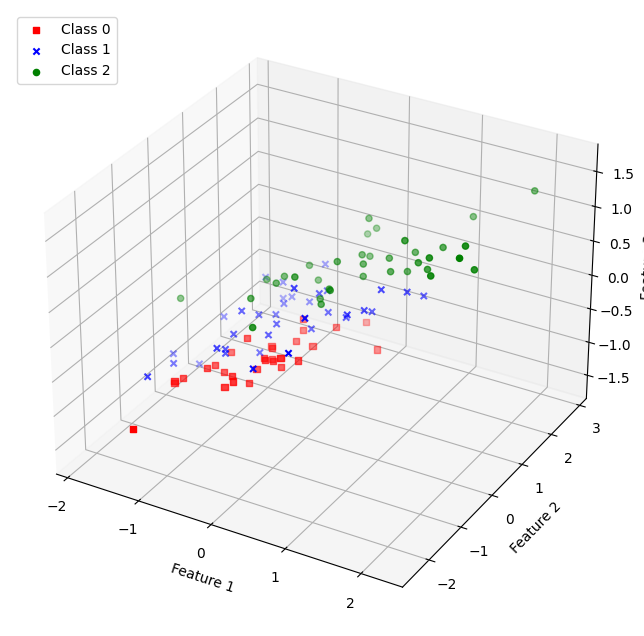

In [29]:
# 3D 데이터 추출
X_train_3d = X_train_std[:, :3]
X_test_3d = X_test_std[:, :3]

# 3D에서 SVM 학습
svm_3d = SVC(kernel='linear', C=1.0, random_state=42)
svm_3d.fit(X_train_3d, y_train)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for i, color, marker in zip(np.unique(y), colors, markers):
    ax.scatter(X_train_3d[y_train == i][:, 0], X_train_3d[y_train == i][:, 1], X_train_3d[y_train == i][:, 2], c=color, marker=marker, label=f'Class {i}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend(loc='upper left')
plt.show()